<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تمرین عملی 2: طبقه بندی تصاویر Cifar10 با شبکه های کانولوشنالی روی googleColab</div></center></h1>

[![Run in Google Colab](https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/blob/master/homework/images/colab.png?raw=1)](https://colab.research.google.com/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/homework/ex2-conv-cifar10-in-colab.ipynb)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">صورت مساله</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
با شبکه های کانولوشنالی آشنا شدیم<br>
توصیه می‌شود حتما بعد از تمرین اول این تمرین را حل کنید و قبل از این تمرین نوت بوک زیر را  مرور کنید:
</div>

[06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb ](https://nbviewer.jupyter.org/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در این تمرین از مجموعه داده تصویری cifar10 استفاده خواهیم کرد.
<br>
خیلی از اوقات ممکنه دسترسی به GPU نداشته باشیم. حخوشبختانه سرویس های آنلاین و رایگانی هستند که توان محاسباتی رایگان در اختیارمان میگذراند. در این تمرین از شما خواسته شده که این نوت بوک را در گوگل کولب اجرا کنید.
<br>
 قبلا در مورد گوگل کولب دو پست آموزشی نوشته شده است که در صورت تمایل به کسب اطلاعات بیشتر میتوانید بخوانید.
    اما برای اجرا این تمرین نیازی به این جزئیات نخواهید داشت.
</div>

[آشنایی با سرویس ابری Google Colab ](http://blog.class.vision/1397/02/google-colab/)

[اتصال مستقیم سرویس کولب (Google Colab) به درایو (Google Drive) از طریق فایل سیستم FUSE ](http://blog.class.vision/1397/04/%D8%A7%D8%AA%D8%B5%D8%A7%D9%84-%D9%85%D8%B3%D8%AA%D9%82%DB%8C%D9%85-%D8%B3%D8%B1%D9%88%DB%8C%D8%B3-%DA%A9%D9%88%D9%84%D8%A8-google-colab-%D8%A8%D9%87-%D8%AF%D8%B1%D8%A7%DB%8C%D9%88-google-drive/)


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه های مورد نیاز </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
کتابخانه های مورد نیاز این تمرین لود شده اند
<br>
در صورت نیاز میتوانید کتابخانه های بیشتری لود کنید:
</div>

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.datasets import cifar10
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2

2024-05-22 11:55:21.289564: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 11:55:21.290528: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 11:55:21.342696: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 11:55:21.595545: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 11:55:22.281887: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مجموعه داده ی Cifar10 </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
<br>
این مجموعه داده تصاویر رنگی در اندازه ی 32 در 32 و در 10 کلاس مختلف شامل ماشین، کامیون، اسب و ... است که در چارچوب کراس موجود است و از همان استفاده میکنیم.
<br>
اطلاعات بیشتر در مورد این مجموعه داده را از سایت این مجموعه داده میتوانید مطالعه کنید:
<br>
</div>

https://www.cs.toronto.edu/~kriz/cifar.html

In [41]:
(x_train, y_train_org), (x_test, y_test_org) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نگاهی به مجموعه داده بیندازیم...</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
در زیر تصویری که در اندیس 7-ام این مجموعه داده قرار دارد را مشاهده می‌کنیم. این شماره را را به دلخوه عوض کنید و چند تصویر دیگر این مجموعه داده را ببینید.
</div>


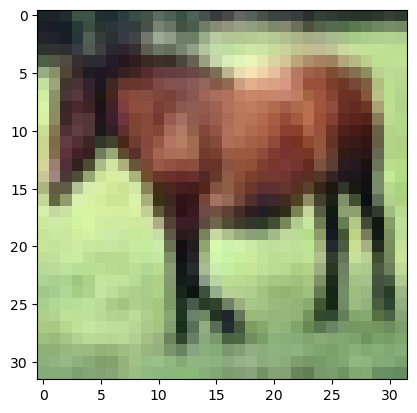

In [ ]:
plt.imshow(x_train[7])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 1:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
ماتریس های تصویر را تبدیل به نوع داده ای float32 کنید و مقادیر پیکسل ها را نرمال کنید و بین 0 و 1 بیاورید.
<br>
<b>راهنمایی: </b>
شما باید متد astype را صدا بزنید و در نهایت مقادیر پیکسل ها را تقسیم بر 255 کنید.</div>

In [42]:
x_train = x_train.astype('float32')
x_train /= 255


In [43]:
x_test = x_test.astype('float32')
x_test /= 255

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 2:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
همان طور که میبینید لیبل ها از نوع عددی هستند. آن ها را تبدیل به فرمت one-hot کنید.<br>
</div>


<hr>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها قبل از تبدیل به فرمت one-hot:</div>

In [ ]:
y_train_org[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [44]:
from keras import utils
y_train = utils.to_categorical(y_train_org)

In [45]:
y_test = utils.to_categorical(y_test_org)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها بعد از تبدیل به فرمت one-hot:</div>

In [ ]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 3:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
یک شبکه کانولوشنالی با معماری زیر بسازید:
<ul>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با64 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    استفاده از لایه ی Flatten() . به نظرتون چرا؟
    </li>    
    <li>
    یک لایه Dropout با ترخ 0.5.
    </li>
    <li>
    یک لایه softmax برای احتمالات خروجی. به نظرتون این لایه چند نوران میخواهد؟
    </li>    

</ul>
</div>


In [ ]:
model_cifar10 = Sequential()
model_cifar10.add(Conv2D(32 , (3 , 3 ) , activation = 'relu' , input_shape = (32, 32 , 3)))
model_cifar10.add(MaxPooling2D(pool_size = (2,2)))
model_cifar10.add(Conv2D(32 , (3 , 3 ) , activation = 'relu'))
model_cifar10.add(MaxPooling2D(pool_size=(2,2)))
model_cifar10.add(Conv2D(64 , (3 , 3 ) , activation = 'relu'))
model_cifar10.add(MaxPooling2D(pool_size=(2,2)))
model_cifar10.add(Flatten())
model_cifar10.add(Dropout(rate = 0.5))
model_cifar10.add(Dense(10 , activation = 'softmax' ))

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 4:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
مدل را کامپایل کنید و به عنوان optimizer متغیر opt_rms به تابع ارسال کنید. </div>


In [ ]:
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001)

model_cifar10.compile(optimizer = opt_rms , loss ="categorical_crossentropy", metrics = ['acc'] )

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 5:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
با فراخوانی متد fit روی مدل آن را آموزش بدهید. برای سادگی25 ایپاک با سایز بچ 64 بزنید.
    <br>
 به عنوان دیتای validation نیز x_test و y_test را ارسال کنید که در هر سری کارایی روی داده های تست اعلام شود.
</div>

In [ ]:
model_cifar10.fit(x_train, y_train, batch_size= 64, epochs = 25 , validation_data=(x_test, y_test))

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - acc: 0.2430 - loss: 2.0233 - val_acc: 0.4512 - val_loss: 1.5307
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.4218 - loss: 1.5849 - val_acc: 0.4800 - val_loss: 1.4219
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.4867 - loss: 1.4391 - val_acc: 0.4814 - val_loss: 1.4639
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.5236 - loss: 1.3356 - val_acc: 0.5130 - val_loss: 1.4131
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.5548 - loss: 1.2564 - val_acc: 0.5804 - val_loss: 1.1739
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.5745 - loss: 1.2049 - val_acc: 0.6058 - val_loss: 1.1196
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.5874 - loss: 1.1652 - val_acc: 0.5563 - val_loss: 1.2311
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.6013 - loss: 1.1340 - val_acc: 0.6304 - val_loss: 1.0450
Epoch 9/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
model_cifar10.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.6685 - loss: 0.9637


[0.9656073451042175, 0.66839998960495]

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 6:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
شبکه و هایپرپارامترهای این شبکه را به هر نحوی دوست دارید تغییر دهید تا دقت روی دادگان تست را به حداکثر برسانید.
</div>


In [59]:
#Changing Layers to Boost Model Accuracy
model_cifar10_boosted = Sequential()
model_cifar10_boosted.add(Conv2D(32 , (3 , 3 ) , activation = 'relu' , padding = "same" , input_shape = (32, 32 , 3)))
model_cifar10_boosted.add(Conv2D(32 , (3 , 3 ) , activation = 'relu' , padding = "same"))
model_cifar10_boosted.add(MaxPooling2D(pool_size = (2,2) , strides= (2,2)))
model_cifar10_boosted.add(Conv2D(64 , (3 , 3 ) , activation = 'relu' , padding = "same"))
model_cifar10_boosted.add(MaxPooling2D(pool_size = (2,2) , strides= (2,2)))
model_cifar10_boosted.add(Flatten())
model_cifar10_boosted.add(Dropout(0.5))
model_cifar10_boosted.add(Dense(10 , activation = 'softmax' ))

In [60]:
model_cifar10_boosted.compile(optimizer = "Adam" , loss ="categorical_crossentropy", metrics = ['acc'] )

In [61]:
model_cifar10_boosted.fit(x_train, y_train, batch_size= 32, epochs = 50 , validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4944 - acc: 0.4640 - val_loss: 1.1314 - val_acc: 0.6038
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1072 - acc: 0.6117 - val_loss: 0.9579 - val_acc: 0.6708
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9798 - acc: 0.6618 - val_loss: 0.9237 - val_acc: 0.6839
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9045 - acc: 0.6857 - val_loss: 0.8177 - val_acc: 0.7197
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8549 - acc: 0.7019 - val_loss: 0.8091 - val_acc: 0.7223
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8154 - acc: 0.7162 - val_loss: 0.7842 - val_acc: 0.7357
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7852 - acc: 0.7277 - val_loss: 0.7502 - val_acc: 0.7386
Epoch 8/50
1563/1563 [==============================] - 9s 6m

In [62]:
model_cifar10_boosted.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7346 - acc: 0.7585


[0.7345794439315796, 0.7584999799728394]

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تمرین عملی 3: طبقه بندی تصاویر Fashion MNIST</div></center></h1>

In [64]:
#Loading Dataset from keras repository
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

#split Dataset into train and test
(train_images, train_labels_org), (test_images, test_labels_org) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [65]:
#Normalizing image data inorder to boost the accuracy of model
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")
train_images /= 255
test_images /=255

In [66]:
#Transforming labels to one-hot encoding inorder to be interpretable by softmax activation function
from keras import utils
train_labels = utils.to_categorical(train_labels_org)
test_labels = utils.to_categorical(test_labels_org)

In [72]:
#Model Creation
model_fmn = Sequential()
model_fmn.add(Conv2D(8, (3,3), activation= 'relu', padding = "same", input_shape = (28,28,1)))
model_fmn.add(MaxPooling2D(2,2))
model_fmn.add(Conv2D(16, (3,3), activation= 'relu' , padding = "same"))
model_fmn.add(MaxPooling2D(2,2))
model_fmn.add(Conv2D(32, (3,3), activation= 'relu' , padding = "same"))
model_fmn.add(MaxPooling2D(2,2))
model_fmn.add(Conv2D(64, (3,3), activation= 'relu' , padding = "same"))
model_fmn.add(MaxPooling2D(2,2))
model_fmn.add(Flatten())
model_fmn.add(Dropout(0.5))
model_fmn.add(Dense(10, activation= 'softmax'))

In [77]:
model_fmn.compile(optimizer = "Adam", loss ="categorical_crossentropy", metrics = ['acc'])

In [69]:
model_fmn.fit(train_images, train_labels,  batch_size=32 ,  epochs= 50)

Epoch 1/50
1875/1875 [==============================] - 10s 4ms/step - loss: 0.7098 - acc: 0.7411
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4626 - acc: 0.8334
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4045 - acc: 0.8564
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3738 - acc: 0.8655
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3524 - acc: 0.8722
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3355 - acc: 0.8786
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3218 - acc: 0.8851
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3128 - acc: 0.8873
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3039 - acc: 0.8894
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2957 - acc: 0.8927
Epoch 11/50
1875/1875 [====

In [70]:
#Evaluation of the Model
model_fmn.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2865 - acc: 0.9051


[0.28650936484336853, 0.9050999879837036]

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تمرین عملی 4: Bachnorm </div></center></h1>

In [78]:
#Adding Batchnorm Layer to the Model
model_fmn = Sequential()
model_fmn.add(Conv2D(8, (3,3), activation= 'relu', padding = "same", input_shape = (28,28,1)))
model_fmn.add(BatchNormalization())
model_fmn.add(MaxPooling2D(2,2))
model_fmn.add(Conv2D(16, (3,3), activation= 'relu' , padding = "same"))
model_fmn.add(BatchNormalization())
model_fmn.add(MaxPooling2D(2,2))
model_fmn.add(Conv2D(32, (3,3), activation= 'relu' , padding = "same"))
model_fmn.add(BatchNormalization())
model_fmn.add(MaxPooling2D(2,2))
model_fmn.add(Conv2D(64, (3,3), activation= 'relu' , padding = "same"))
model_fmn.add(BatchNormalization())
model_fmn.add(MaxPooling2D(2,2))
model_fmn.add(Flatten())
model_fmn.add(Dropout(0.5))
model_fmn.add(Dense(10, activation= 'softmax'))

In [79]:
model_fmn.compile(optimizer = "Adam", loss ="categorical_crossentropy", metrics = ['acc'])

In [80]:
model_fmn.fit(train_images, train_labels,  batch_size=32 ,  epochs= 50)

Epoch 1/50
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5892 - acc: 0.7957
Epoch 2/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3816 - acc: 0.8635
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3334 - acc: 0.8799
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3048 - acc: 0.8909
Epoch 5/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2857 - acc: 0.8972
Epoch 6/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2726 - acc: 0.9013
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2593 - acc: 0.9067
Epoch 8/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2530 - acc: 0.9094
Epoch 9/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2425 - acc: 0.9116
Epoch 10/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2385 - acc: 0.9140
Epoch 11/50
1875/187

In [81]:
#Evaluation of the Model
model_fmn.evaluate(test_images , test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2747 - acc: 0.9132


[0.27470991015434265, 0.9132000207901001]

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تمرین عملی 5: GAP </div></center></h1>

In [9]:
#Loading Data set
mnist = tf.keras.datasets.mnist
(x_train, y_train_org), (x_test, y_test_org) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 2s 0us/step


In [10]:
x_train_32 = x_train.reshape(-1,28,28,1)
x_test_32 = x_test.reshape(-1,28,28,1)
x_train_32.shape

(60000, 28, 28, 1)

In [11]:
y_train = keras.utils.to_categorical(y_train_org)
y_test = keras.utils.to_categorical(y_test_org)

In [ ]:
from Model_creation import model_creation
model = model_creation()

In [ ]:
model.compile(optimizer = 'Adam' , loss = "categorical_crossentropy" , metrics = ["acc"] )

In [ ]:
model.fit(x_train_32, y_train, batch_size= 32 , epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 13s 4ms/step - loss: 0.4512 - acc: 0.8548
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1481 - acc: 0.9582
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1013 - acc: 0.9719
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0783 - acc: 0.9784
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0630 - acc: 0.9822
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0524 - acc: 0.9854
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0481 - acc: 0.9867
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0367 - acc: 0.9895
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0355 - acc: 0.9899
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0298 - acc: 0.9918
Epoch 11/25
1875/1875 [=====

In [ ]:
model.evaluate(x_test_32, y_test)

313/313 [==============================] - 4s 9ms/step - loss: 0.0398 - acc: 0.9940


[0.039761289954185486, 0.9940000176429749]

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تمرین عملی 6: بازشناسی از روی تصویر کاغذ </div></center></h1>

In [35]:
model = Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [36]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy" , metrics = ["acc"])

In [37]:
model.fit(x_train_32, y_train, batch_size= 32 , epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 10s 4ms/step - loss: 1.4544 - acc: 0.4654
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8714 - acc: 0.7027
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6820 - acc: 0.7772
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5763 - acc: 0.8149
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5101 - acc: 0.8385
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4586 - acc: 0.8561
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4264 - acc: 0.8672
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3953 - acc: 0.8788
Epoch 9/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3770 - acc: 0.8852
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3539 - acc: 0.8927
Epoch 11/25
1875/1875 [=====

In [38]:
digit_lists = []

# Read the input image (make sure it's a binary image)

image = cv2.imread('english-digits.jpg', cv2.IMREAD_GRAYSCALE)
#plt.imshow(image, cmap = 'gray')

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
#plt.imshow(binary_image, cmap = 'gray')

binary_image = 255-binary_image
#plt.imshow(binary_image, cmap = 'gray')

# Use connectedComponentsWithStats to obtain labels and bounding boxes
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Iterate through each connected component
for label in range(1, num_labels):
    # Get the bounding box of the current connected component
    x, y, w, h = stats[label][:4]

    # Crop the connected component using the bounding box
    connected_component = image[y:y+h, x:x+w]

    # Display or save the cropped connected component
    digit_lists.append(connected_component)

In [22]:
digit_lists[0]

array([[202, 207, 206, 195, 184, 176, 164, 153, 131, 126, 134, 161, 186,
        195, 199, 205, 204, 204, 204],
       [209, 206, 190, 163, 140, 127, 119, 112, 102,  93,  91, 113, 152,
        181, 195, 204, 207, 207, 206],
       [214, 190, 152, 116,  96,  96, 107, 115, 125, 119,  98,  90, 113,
        147, 179, 203, 207, 209, 207],
       [204, 157, 105,  83,  91, 114, 142, 162, 174, 172, 143, 105,  91,
        102, 136, 176, 195, 204, 208],
       [183, 122,  74,  86, 130, 166, 188, 201, 207, 207, 186, 152, 116,
         82,  87, 126, 175, 193, 206],
       [166, 101,  64, 104, 173, 209, 213, 211, 220, 218, 209, 198, 161,
         93,  64,  88, 158, 183, 204],
       [132,  81,  78, 139, 195, 214, 214, 209, 212, 211, 218, 216, 205,
        158,  84,  51,  87, 141, 197],
       [114,  77,  91, 156, 204, 216, 214, 210, 214, 209, 214, 216, 214,
        175,  97,  56,  56, 106, 175],
       [ 87,  71, 108, 178, 213, 214, 212, 208, 215, 207, 210, 215, 222,
        192, 112,  60,  37,  72, 148],
       [ 68,  69, 125, 196, 215, 209, 208, 206, 214, 206, 211, 213, 221,
        199, 120,  59,  44,  58, 126],
       [ 65,  74, 139, 207, 216, 206, 209, 207, 210, 208, 214, 210, 213,
        197, 123,  57,  54,  52, 108],
       [ 71,  81, 147, 212, 216, 208, 214, 210, 208, 209, 217, 208, 208,
        200, 131,  61,  51,  48,  91],
       [ 73,  79, 145, 210, 214, 210, 216, 208, 209, 209, 217, 206, 210,
        211, 147,  72,  52,  50,  80],
       [ 70,  74, 139, 205, 211, 210, 215, 204, 210, 209, 215, 206, 215,
        223, 160,  82,  60,  58,  76],
       [ 62,  47, 100, 186, 218, 212, 211, 212, 208, 208, 209, 214, 212,
        217, 185,  98,  60,  42,  78],
       [ 55,  42,  96, 182, 213, 209, 209, 211, 209, 208, 209, 213, 211,
        217, 189, 105,  62,  42,  75],
       [ 52,  41,  97, 181, 211, 207, 209, 211, 210, 208, 209, 213, 209,
        218, 195, 118,  67,  41,  72],
       [ 57,  50, 106, 186, 213, 209, 211, 212, 212, 209, 209, 212, 207,
        217, 202, 132,  71,  41,  69],
       [ 66,  61, 116, 191, 213, 208, 209, 210, 212, 209, 209, 212, 206,
        216, 207, 144,  73,  42,  70],
       [ 70,  68, 123, 194, 212, 205, 206, 206, 212, 209, 210, 213, 205,
        214, 209, 153,  73,  43,  72],
       [ 74,  74, 129, 197, 212, 205, 207, 207, 212, 209, 212, 215, 204,
        212, 210, 158,  72,  43,  76],
       [ 76,  77, 134, 201, 215, 208, 211, 210, 211, 209, 212, 216, 204,
        211, 210, 160,  71,  44,  79],
       [ 68,  75, 130, 195, 212, 207, 209, 207, 209, 213, 217, 215, 200,
        219, 218, 143,  68,  33,  97],
       [ 77,  66, 110, 183, 213, 210, 210, 213, 207, 210, 212, 211, 202,
        219, 209, 132,  65,  41, 106],
       [ 83,  55,  90, 174, 216, 211, 209, 218, 217, 214, 211, 209, 208,
        219, 190, 111,  53,  52, 123],
       [ 98,  57,  80, 166, 216, 209, 203, 212, 218, 212, 207, 209, 216,
        214, 161,  82,  38,  66, 145],
       [128,  72,  70, 142, 203, 211, 204, 206, 210, 205, 207, 214, 220,
        195, 120,  51,  36,  91, 170],
       [157,  97,  67, 108, 173, 207, 211, 208, 209, 209, 216, 217, 207,
        156,  77,  38,  65, 130, 193],
       [190, 149, 104,  97, 131, 169, 187, 189, 191, 193, 198, 187, 161,
        104,  53,  65, 116, 175, 212],
       [224, 206, 158, 107,  96, 119, 143, 152, 152, 155, 158, 139, 108,
         63,  49, 106, 157, 207, 222],
       [217, 215, 200, 166, 124,  91,  78,  77,  77,  83,  81,  66,  56,
         76, 123, 163, 213, 213, 212],
       [212, 215, 210, 188, 156, 127, 111, 106,  88,  95, 100, 102, 110,
        136, 175, 205, 213, 212, 212]], dtype=uint8)

In [24]:
first=digit_lists[0].reshape(-1,32,19,1)

In [25]:
model.predict(first)

1/1 [==============================] - 0s 18ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
digit_lists[1]

array([[207, 208, 196, ..., 205, 209, 210],
       [208, 200, 177, ..., 202, 208, 211],
       [200, 172, 135, ..., 204, 202, 205],
       ...,
       [127,  77,  75, ..., 216, 207, 203],
       [192, 145,  99, ..., 201, 200, 205],
       [216, 198, 174, ..., 204, 206, 205]], dtype=uint8)

In [26]:
first=digit_lists[1].reshape(-1,41,26,1)
model.predict(first)

1/1 [==============================] - 0s 153ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [30]:
digit_lists[2]

array([[206, 203, 205, ..., 200, 202, 201],
       [206, 203, 205, ..., 200, 201, 201],
       [206, 207, 207, ..., 202, 203, 202],
       ...,
       [213, 216, 207, ...,  73,  97, 148],
       [210, 207, 208, ...,  48,  55, 111],
       [203, 211, 209, ..., 123, 106, 136]], dtype=uint8)

In [32]:
first=digit_lists[2].reshape(-1,42,29,1)
model.predict(first)

1/1 [==============================] - 0s 17ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

array([[195, 189, 180, ..., 198, 198, 199],
       [194, 196, 184, ..., 198, 198, 198],
       [192, 198, 185, ..., 198, 198, 198],
       ...,
       [194, 195, 195, ..., 197, 197, 199],
       [198, 197, 197, ..., 196, 197, 198],
       [200, 197, 197, ..., 197, 198, 198]], dtype=uint8)
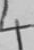

In [39]:
digit_lists[3]

In [40]:
first=digit_lists[3].reshape(-1,50,34,1)
model.predict(first)

1/1 [==============================] - 0s 68ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)